# ADVANCED MODEL : THE PROPHET MODEL

## Introduction:

Time series analysis is an approach to analyse time series data to extract meaningful characteristics of data and generate other useful insights applied in business situation. The Prophet library is an open-source algorithm developed for making forecasts for univariate time series datasets. It is based on an additive model that fits non-linear patterns with yearly and weekly seasonality, as well as holidays. It works best with daily periodicity data with at least one year of historical data. It is easy to use and designed to automatically find a good set of hyperparameters for the model. This model was introduced by Facebook originally for forecasting daily data with weekly and yearly seasonality, plus holiday effects. It was later extended to cover more types of seasonal data. It works best with time series that have strong seasonality and several seasons of historical data.

At its core is the sum of three functions of time plus an error term: growth g(t), seasonality s(t), holidays h(t), and error εt. It can be considered as a nonlinear regression model, of the form : 
              
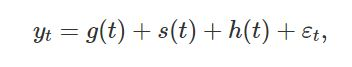
                                
                                
where, 
- g(t): piecewise linear or logistic growth curve for modelling non-periodic changes in time series.
- s(t): periodic changes (e.g. weekly/yearly seasonality).
- h(t): effects of holidays (user provided) with irregular schedules.
- εt:   error term accounts for any unusual changes not accommodated by the model.


### Why did we choose the Prophet Model?

1. Since the dataset is from a bank which receives various applications for various financial services, it is subject to  seasonal trends, periodic changes as well as holidays. For this reason we chose to work with the Prophet model, which allows for non-linear patterns such as weekly, annual, and seasonal data.
 
2. Changepoints are moments in the data where the data shifts direction. Detection of change point is an important part of time series analysis, as the presence of a change point indicates an abrupt and significant change in the data generating process. By default, Prophet will identify these changepoints and allow the trend to adapt accordingly. This will allow us to see where the data has changed in the past, such as whether the number of applications increased or decreased over time.

In [60]:
#Importing libraries
import pandas as pd 
from fbprophet import Prophet
import matplotlib.pyplot as plt 

In [32]:
#Reading the dataset
data=pd.read_csv("Trainpm.csv")

In [33]:
#Checking the shape of the dataset
data.shape

(79922, 6)

In [34]:
#To display the first set of values of the dataset 
data.head()

,application_date,segment,branch_id,state,zone,no_of_applicants
0,01-04-2017,1.0,1.0,WEST BENGAL,EAST,40.0
1,01-04-2017,1.0,3.0,DELHI,NORTH,58.0
2,01-04-2017,1.0,5.0,KARNATAKA,SOUTH,10.0
3,01-04-2017,1.0,7.0,WEST BENGAL,EAST,2.0
4,01-04-2017,1.0,8.0,WEST BENGAL,EAST,13.0


In [35]:
#To display the last set of values of the dataset
data.tail()

,application_date,segment,branch_id,state,zone,no_of_applicants
79917,23-06-2019,2.0,NaN,PUNJAB,NaN,0.0
79918,23-06-2019,2.0,NaN,TAMIL NADU,NaN,3742.0
79919,23-06-2019,2.0,NaN,TRIPURA,NaN,129.0
79920,23-06-2019,2.0,NaN,UTTAR PRADESH,NaN,317.0
79921,23-06-2019,2.0,NaN,WEST BENGAL,NaN,982.0


In [36]:
#To check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79922 entries, 0 to 79921
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   application_date  77432 non-null  object 
 1   segment           77432 non-null  float64
 2   branch_id         64408 non-null  float64
 3   state             77432 non-null  object 
 4   zone              64408 non-null  object 
 5   no_of_applicants  77432 non-null  float64
dtypes: float64(3), object(3)
memory usage: 3.7+ MB


In [37]:
#Changing the data types from object to datetime
data['application_date']=pd.to_datetime(data['application_date'],format='%d-%m-%Y')

In [38]:
data['application_date']

0       2017-04-01
1       2017-04-01
2       2017-04-01
3       2017-04-01
4       2017-04-01
           ...    
79917   2019-06-23
79918   2019-06-23
79919   2019-06-23
79920   2019-06-23
79921   2019-06-23
Name: application_date, Length: 79922, dtype: datetime64[ns]

In [39]:
data['no_of_applicants']

0          40.0
1          58.0
2          10.0
3           2.0
4          13.0
          ...  
79917       0.0
79918    3742.0
79919     129.0
79920     317.0
79921     982.0
Name: no_of_applicants, Length: 79922, dtype: float64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79922 entries, 0 to 79921
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   application_date  77432 non-null  datetime64[ns]
 1   segment           77432 non-null  float64       
 2   branch_id         64408 non-null  float64       
 3   state             77432 non-null  object        
 4   zone              64408 non-null  object        
 5   no_of_applicants  77432 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 3.7+ MB


## DIVIDING INTO SEGMENTS 

##### The dataset is divided into two segments based on the column "segment," named as "segment 1" and "segment 2." This is done to determine how each section contributes to the total number of applications received.



In [41]:
segment1=data[data.segment==1]

In [42]:
segment1

,application_date,segment,branch_id,state,zone,no_of_applicants
0,2017-04-01,1.0,1.0,WEST BENGAL,EAST,40.0
1,2017-04-01,1.0,3.0,DELHI,NORTH,58.0
2,2017-04-01,1.0,5.0,KARNATAKA,SOUTH,10.0
3,2017-04-01,1.0,7.0,WEST BENGAL,EAST,2.0
4,2017-04-01,1.0,8.0,WEST BENGAL,EAST,13.0
...,...,...,...,...,...,...
64403,2019-06-05,1.0,267.0,ANDHRA PRADESH,SOUTH,0.0
64404,2019-06-05,1.0,268.0,UTTAR PRADESH,EAST,0.0
64405,2019-06-05,1.0,269.0,UTTAR PRADESH,EAST,0.0
64406,2019-06-05,1.0,270.0,UTTAR PRADESH,EAST,9.0


In [43]:
segment1.tail()

,application_date,segment,branch_id,state,zone,no_of_applicants
64403,2019-06-05,1.0,267.0,ANDHRA PRADESH,SOUTH,0.0
64404,2019-06-05,1.0,268.0,UTTAR PRADESH,EAST,0.0
64405,2019-06-05,1.0,269.0,UTTAR PRADESH,EAST,0.0
64406,2019-06-05,1.0,270.0,UTTAR PRADESH,EAST,9.0
64407,2019-06-05,1.0,271.0,HARYANA,NORTH,0.0


In [44]:
segment2=data[data.segment==2]
segment2

,application_date,segment,branch_id,state,zone,no_of_applicants
66898,2017-04-01,2.0,NaN,ASSAM,NaN,0.0
66899,2017-04-01,2.0,NaN,BIHAR,NaN,0.0
66900,2017-04-01,2.0,NaN,CHHATTISGARH,NaN,34.0
66901,2017-04-01,2.0,NaN,GUJARAT,NaN,0.0
66902,2017-04-01,2.0,NaN,HARYANA,NaN,0.0
...,...,...,...,...,...,...
79917,2019-06-23,2.0,NaN,PUNJAB,NaN,0.0
79918,2019-06-23,2.0,NaN,TAMIL NADU,NaN,3742.0
79919,2019-06-23,2.0,NaN,TRIPURA,NaN,129.0
79920,2019-06-23,2.0,NaN,UTTAR PRADESH,NaN,317.0


In [45]:
segment2.tail()

,application_date,segment,branch_id,state,zone,no_of_applicants
79917,2019-06-23,2.0,NaN,PUNJAB,NaN,0.0
79918,2019-06-23,2.0,NaN,TAMIL NADU,NaN,3742.0
79919,2019-06-23,2.0,NaN,TRIPURA,NaN,129.0
79920,2019-06-23,2.0,NaN,UTTAR PRADESH,NaN,317.0
79921,2019-06-23,2.0,NaN,WEST BENGAL,NaN,982.0


In [101]:
segment2.head()

,application_date,segment,branch_id,state,zone,no_of_applicants
66898,2017-04-01,2.0,NaN,ASSAM,NaN,0.0
66899,2017-04-01,2.0,NaN,BIHAR,NaN,0.0
66900,2017-04-01,2.0,NaN,CHHATTISGARH,NaN,34.0
66901,2017-04-01,2.0,NaN,GUJARAT,NaN,0.0
66902,2017-04-01,2.0,NaN,HARYANA,NaN,0.0


## MODELING : For segmented data 

### SEGMENT 1

In [46]:
#Initializing the Model
model1=Prophet()

In [47]:
#Dividing the dataset into a subset with only application dates and no of applicants
df1= segment1[["application_date", "no_of_applicants"]]
df1

,application_date,no_of_applicants
0,2017-04-01,40.0
1,2017-04-01,58.0
2,2017-04-01,10.0
3,2017-04-01,2.0
4,2017-04-01,13.0
...,...,...
64403,2019-06-05,0.0
64404,2019-06-05,0.0
64405,2019-06-05,0.0
64406,2019-06-05,9.0


In [48]:
#Removing na values
df1.dropna(axis=0,inplace=True)

<ipython-input-48-aeddcd976d8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(axis=0,inplace=True)


In [49]:
#Renaming application date as "ds" and no of applicants as "y"
df1=df1.rename(columns={"application_date":"ds","no_of_applicants":"y"})
df1

,ds,y
0,2017-04-01,40.0
1,2017-04-01,58.0
2,2017-04-01,10.0
3,2017-04-01,2.0
4,2017-04-01,13.0
...,...,...
64403,2019-06-05,0.0
64404,2019-06-05,0.0
64405,2019-06-05,0.0
64406,2019-06-05,9.0


In [50]:
#Fitting the model
model1.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
#Creating future dates of 30 days
future_dates1=model1.make_future_dataframe(periods=30)

In [52]:
future_dates1.tail()

,ds
801,2019-07-01
802,2019-07-02
803,2019-07-03
804,2019-07-04
805,2019-07-05


In [53]:
#Predicting the values
prediction1=model1.predict(future_dates1)

In [54]:
prediction1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
801,2019-07-01,47.121961,-21.723217,133.984172,44.106222,50.852018,7.293025,7.293025,7.293025,6.088447,6.088447,6.088447,1.204578,1.204578,1.204578,0.0,0.0,0.0,54.414987
802,2019-07-02,47.137624,-26.509237,126.940724,43.927127,51.126501,1.886195,1.886195,1.886195,0.864752,0.864752,0.864752,1.021443,1.021443,1.021443,0.0,0.0,0.0,49.023819
803,2019-07-03,47.153287,-17.744629,136.917345,43.812631,51.317030,7.202797,7.202797,7.202797,6.382968,6.382968,6.382968,0.819829,0.819829,0.819829,0.0,0.0,0.0,54.356084
804,2019-07-04,47.168950,-30.116072,125.095185,43.652331,51.602209,2.027823,2.027823,2.027823,1.426087,1.426087,1.426087,0.601736,0.601736,0.601736,0.0,0.0,0.0,49.196773
805,2019-07-05,47.184613,-21.177504,124.451637,43.473897,52.007394,1.537549,1.537549,1.537549,1.168197,1.168197,1.168197,0.369352,0.369352,0.369352,0.0,0.0,0.0,48.722163


In [55]:
prediction1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-04-01,18.883098,-70.957740,89.283431,18.883098,18.883098,-8.446288,-8.446288,-8.446288,-2.474460,-2.474460,-2.474460,-5.971828,-5.971828,-5.971828,0.0,0.0,0.0,10.436810
1,2017-04-03,19.478579,-62.732147,99.596456,19.478579,19.478579,-0.579671,-0.579671,-0.579671,6.088447,6.088447,6.088447,-6.668118,-6.668118,-6.668118,0.0,0.0,0.0,18.898908
2,2017-04-04,19.776319,-71.174326,88.308576,19.776319,19.776319,-6.176552,-6.176552,-6.176552,0.864752,0.864752,0.864752,-7.041304,-7.041304,-7.041304,0.0,0.0,0.0,13.599768
3,2017-04-05,20.074060,-56.795073,99.850974,20.074060,20.074060,-1.040337,-1.040337,-1.040337,6.382968,6.382968,6.382968,-7.423305,-7.423305,-7.423305,0.0,0.0,0.0,19.033723
4,2017-04-07,20.669541,-62.602806,89.041149,20.669541,20.669541,-7.022052,-7.022052,-7.022052,1.168197,1.168197,1.168197,-8.190249,-8.190249,-8.190249,0.0,0.0,0.0,13.647490


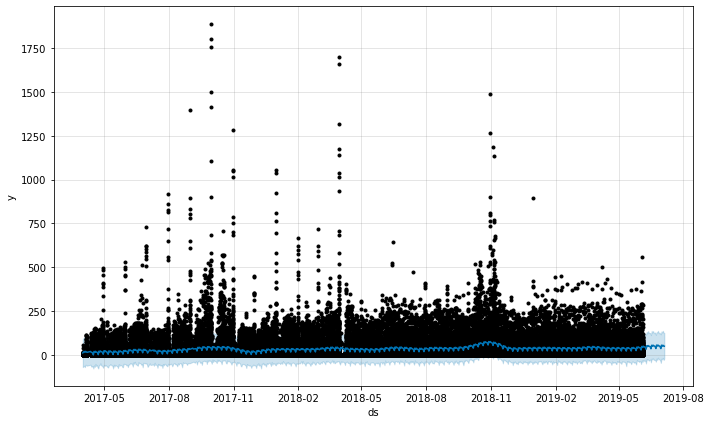

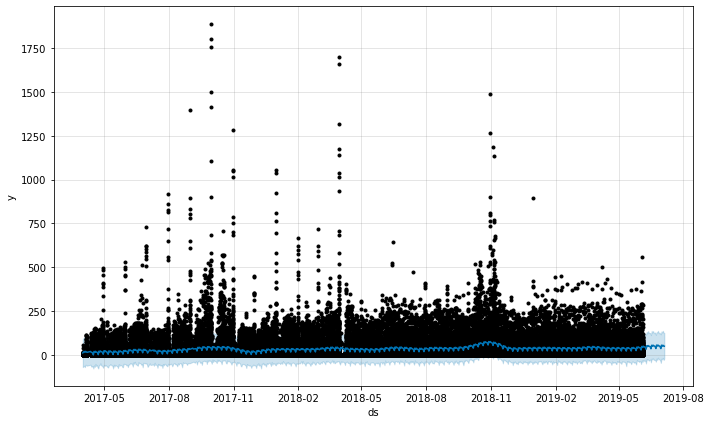

In [56]:
#Plotting the predicted projection
model1.plot(prediction1)

##### The projection is shown by the blue line, the trend space is represented by the blue space, and the actual data is represented by the black dots. From the above graph it can be deduced that the segment 1 data forecast follows a moderately level projection.

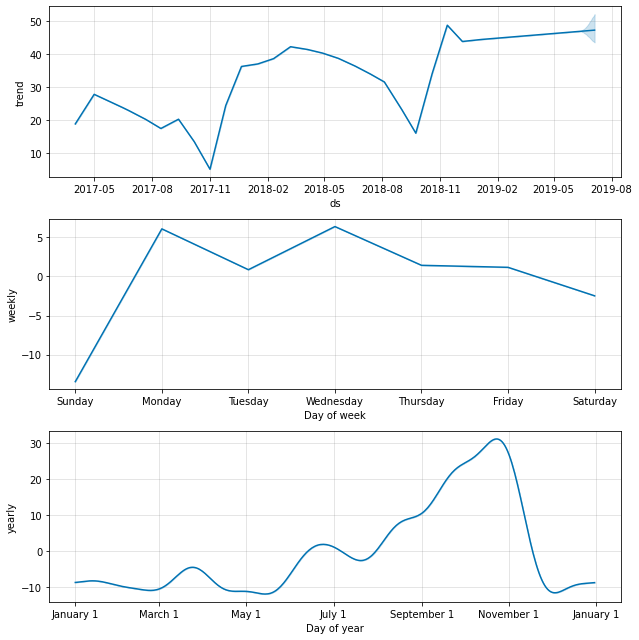

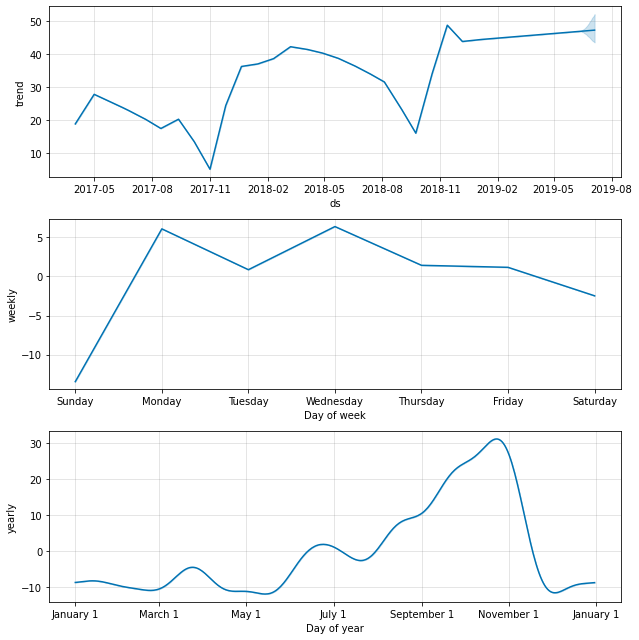

In [57]:
#Visualizing each of the components[Trends,Weekly,yearly]
model1.plot_components(prediction1)

##### The following conclusions may be drawn from the segment 1 data that is forecasted on a weekly, monthly, and annual basis:

##### In the first graph the curve follows an an overall rising pattern from 2017 to 2019. The year 2017 began with a modest gain, but fell sharply from August to October, before steadily picking up towards the end of the year. There is another dip, initially gradual, followed by a sharp fall around May to October 2018. Thereafter, the no of applicants rises sharply around Jan 2019 and then becomes steadily gradually rising.

##### The weekly trend from Sunday through Saturday is depicted in the second graph. It is evident that two days, Mondays and Wednesdays, receive the most applications, with a little fall on Tuesday. The rest of the days i.e. Thursday, Friday, and Saturday, show a gradual decline in the no of applicants.

##### The third graph depicts a monthwise pattern aggregated across the year. It can be deduced that the number of applications received has a generally progressive increase till November, where it reaches an all-time high, before falling steeply in December.

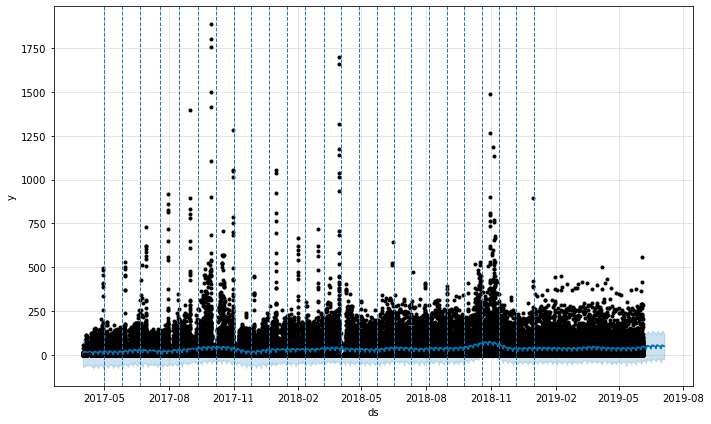

In [61]:
figure1 = model1.plot(prediction1)
for changepoint in model1.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

##### The vertical lines represent the change points (it shows the change in the direction of the data). 

### SEGMENT 2

In [62]:
#Initializing the Model
model2=Prophet()

In [63]:
#Dividing the dataset into a subset with only application dates and no of applicants
df2= segment2[["application_date", "no_of_applicants"]]
df2

,application_date,no_of_applicants
66898,2017-04-01,0.0
66899,2017-04-01,0.0
66900,2017-04-01,34.0
66901,2017-04-01,0.0
66902,2017-04-01,0.0
...,...,...
79917,2019-06-23,0.0
79918,2019-06-23,3742.0
79919,2019-06-23,129.0
79920,2019-06-23,317.0


In [64]:
#Removing na values
df2.dropna(axis=0,inplace=True)

<ipython-input-64-e92c76460326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis=0,inplace=True)


In [65]:
#Renaming application date as "ds" and no of applicants as "y"
df2=df2.rename(columns={"application_date":"ds","no_of_applicants":"y"})
df2

,ds,y
66898,2017-04-01,0.0
66899,2017-04-01,0.0
66900,2017-04-01,34.0
66901,2017-04-01,0.0
66902,2017-04-01,0.0
...,...,...
79917,2019-06-23,0.0
79918,2019-06-23,3742.0
79919,2019-06-23,129.0
79920,2019-06-23,317.0


In [66]:
#Fitting the model
model2.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
## Creating future dates of 30 days
future_dates2=model2.make_future_dataframe(periods=30)

In [68]:
future_dates2.tail()

,ds
839,2019-07-19
840,2019-07-20
841,2019-07-21
842,2019-07-22
843,2019-07-23


In [69]:
prediction2=model2.predict(future_dates2)

In [70]:
prediction2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-04-01,335.222641,-1871.627925,2447.263271,335.222641,335.222641,-49.555080,-49.555080,-49.555080,17.145474,17.145474,17.145474,-66.700555,-66.700555,-66.700555,0.0,0.0,0.0,285.667561
1,2017-04-02,337.502001,-2037.362026,2217.959689,337.502001,337.502001,-359.830316,-359.830316,-359.830316,-281.106195,-281.106195,-281.106195,-78.724120,-78.724120,-78.724120,0.0,0.0,0.0,-22.328315
2,2017-04-03,339.781360,-1906.095106,2326.538600,339.781360,339.781360,-103.702015,-103.702015,-103.702015,-14.747139,-14.747139,-14.747139,-88.954876,-88.954876,-88.954876,0.0,0.0,0.0,236.079346
3,2017-04-04,342.060720,-1664.655054,2479.841437,342.060720,342.060720,-33.054189,-33.054189,-33.054189,64.379685,64.379685,64.379685,-97.433875,-97.433875,-97.433875,0.0,0.0,0.0,309.006531
4,2017-04-05,344.340080,-1619.019672,2410.587586,344.340080,344.340080,-35.175221,-35.175221,-35.175221,69.062801,69.062801,69.062801,-104.238022,-104.238022,-104.238022,0.0,0.0,0.0,309.164859


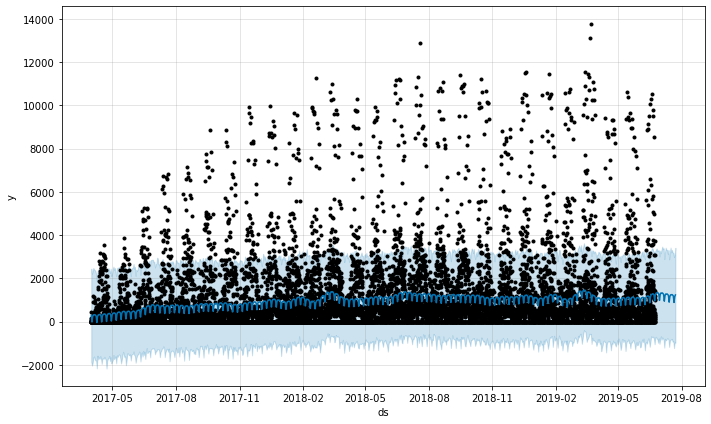

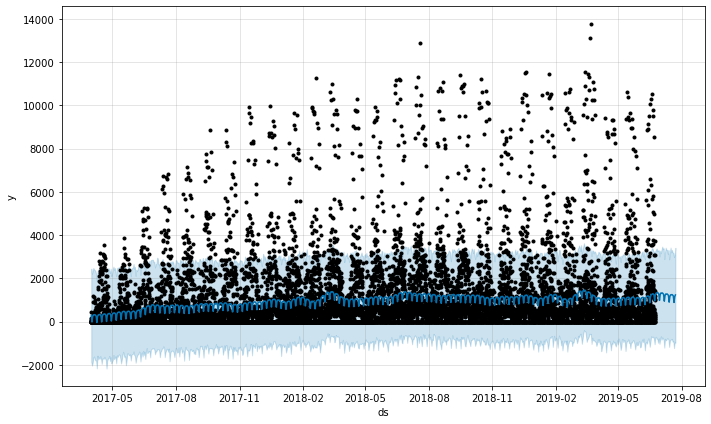

In [71]:
#Plotting the predicted projection
model2.plot(prediction2)

##### The projection is shown by the blue line, trend space is represented by the blue space, and the actual data points are represented by the black dots. From the following graph it can be inferred that the segment 2 data has a moderately level projection.

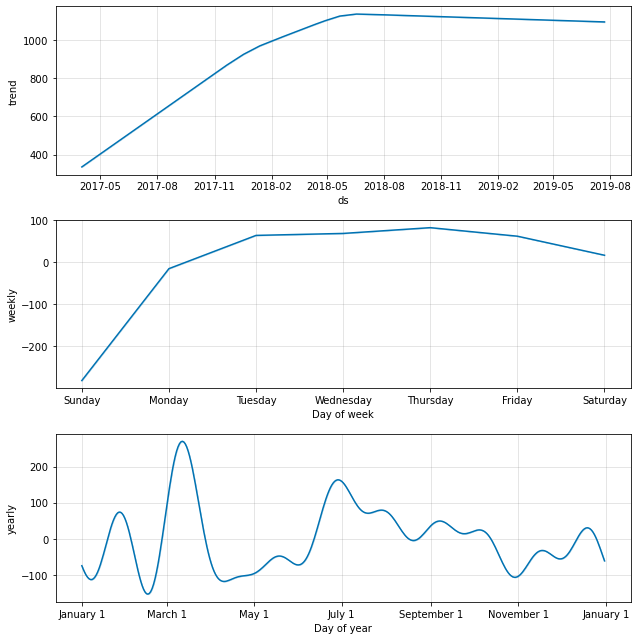

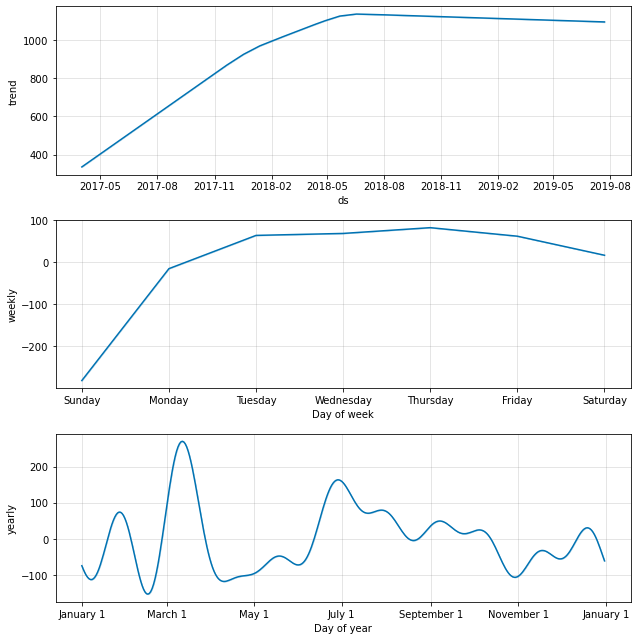

In [72]:
#Visualizing each of the components[Trends,Weekly,Yearly]
model2.plot_components(prediction2)

##### The following conclusions may be drawn from the segment 2 data that is forecasted on a weekly, monthly, and annual basis:

##### The first graph illustrates that the trend shows a progressive growth from 2017 to 2018, and followed by a minor reduction towards the end of 2019.

##### In the second graph the weekly trend is depicted. It is evident that the number of applications received rises on Monday, Tuesday, and Wednesday, peaks on Thursday, then gradually declines on Friday and Saturday, with no applications received on Sunday.

##### The third graph depicts a monthly pattern from 2017 to 2019. We can deduce that the number of applications received in March and April are substantially greater than those received in July and August. The months of Mid-February, May and November saw the least amount of applications.

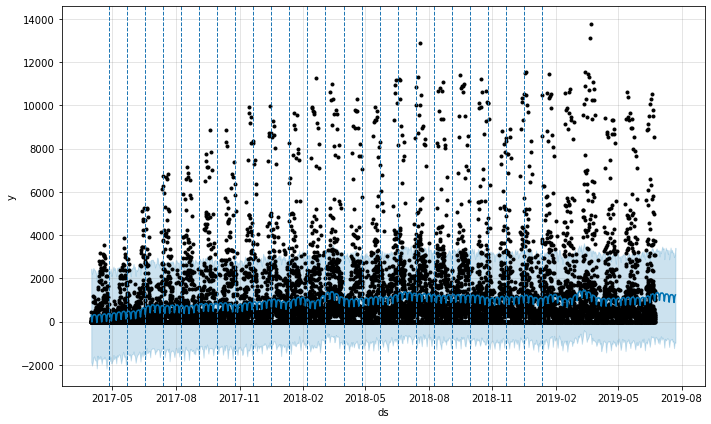

In [73]:
figure2 = model2.plot(prediction2)
for changepoint in model2.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

##### The vertical lines represent the change points (it shows the change in the direction of the data). 

## GROUPING 

##### For each segment, data was collated for each date. Number of applicants data was summed up for each date irrespective of branch or state. The data of segment 1 and segment 2 have been named group1 and group2 respectively.

In [74]:
#Grouping the data w.r.t application date and no of applicants 
group1=segment1[segment1['segment']==1].groupby(['application_date']).sum().reset_index()[['application_date','no_of_applicants']].sort_values('application_date')

In [75]:
group1

,application_date,no_of_applicants
0,2017-04-01,299.0
1,2017-04-03,42.0
2,2017-04-04,23.0
3,2017-04-05,1530.0
4,2017-04-07,1341.0
...,...,...
771,2019-06-01,2684.0
772,2019-06-02,1948.0
773,2019-06-03,4520.0
774,2019-06-04,4757.0


In [76]:
#Grouping the data w.r.t application date and no of applicants 
group2=segment2[segment2['segment']==2].groupby(['application_date']).sum().reset_index()[['application_date','no_of_applicants']].sort_values('application_date')

In [77]:
group2

,application_date,no_of_applicants
0,2017-04-01,897.0
1,2017-04-02,605.0
2,2017-04-03,2016.0
3,2017-04-04,2245.0
4,2017-04-05,2415.0
...,...,...
809,2019-06-19,31360.0
810,2019-06-20,30255.0
811,2019-06-21,28593.0
812,2019-06-22,25863.0


## MODELING : For Grouped Data 

### GROUP 1 

In [78]:
#Initializing the Model
model3=Prophet()

In [79]:
#Creating a subset of dataset with only application date and no of applicants
df3= group1[["application_date", "no_of_applicants"]]
df3

,application_date,no_of_applicants
0,2017-04-01,299.0
1,2017-04-03,42.0
2,2017-04-04,23.0
3,2017-04-05,1530.0
4,2017-04-07,1341.0
...,...,...
771,2019-06-01,2684.0
772,2019-06-02,1948.0
773,2019-06-03,4520.0
774,2019-06-04,4757.0


In [80]:
#Removing na values
df3.dropna(axis=0,inplace=True)

In [81]:
#Renaming the columns
df3=df3.rename(columns={"application_date":"ds","no_of_applicants":"y"})
df3

,ds,y
0,2017-04-01,299.0
1,2017-04-03,42.0
2,2017-04-04,23.0
3,2017-04-05,1530.0
4,2017-04-07,1341.0
...,...,...
771,2019-06-01,2684.0
772,2019-06-02,1948.0
773,2019-06-03,4520.0
774,2019-06-04,4757.0


In [82]:
#Fitting the model
model3.fit(df3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
#Creating future dates of 30 days
forecast_dates3=model3.make_future_dataframe(periods=30)
forecast_dates3.tail()

,ds
801,2019-07-01
802,2019-07-02
803,2019-07-03
804,2019-07-04
805,2019-07-05


In [84]:
#Predicting the values
prediction3=model3.predict(forecast_dates3)

In [85]:
prediction3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-04-01,1599.336248,-860.080112,3724.505471,1599.336248,1599.336248,-242.017777,-242.017777,-242.017777,-208.026965,-208.026965,-208.026965,-33.990812,-33.990812,-33.990812,0.0,0.0,0.0,1357.318471
1,2017-04-03,1605.373567,-367.552480,4334.592655,1605.373567,1605.373567,402.538781,402.538781,402.538781,507.302335,507.302335,507.302335,-104.763554,-104.763554,-104.763554,0.0,0.0,0.0,2007.912348
2,2017-04-04,1608.392227,-827.846985,4043.356537,1608.392227,1608.392227,-66.097574,-66.097574,-66.097574,74.849410,74.849410,74.849410,-140.946984,-140.946984,-140.946984,0.0,0.0,0.0,1542.294653
3,2017-04-05,1611.410886,-282.652444,4181.015084,1611.410886,1611.410886,349.710070,349.710070,349.710070,526.691620,526.691620,526.691620,-176.981550,-176.981550,-176.981550,0.0,0.0,0.0,1961.120957
4,2017-04-07,1617.448206,-833.440427,3700.581194,1617.448206,1617.448206,-152.785994,-152.785994,-152.785994,93.890513,93.890513,93.890513,-246.676506,-246.676506,-246.676506,0.0,0.0,0.0,1464.662212


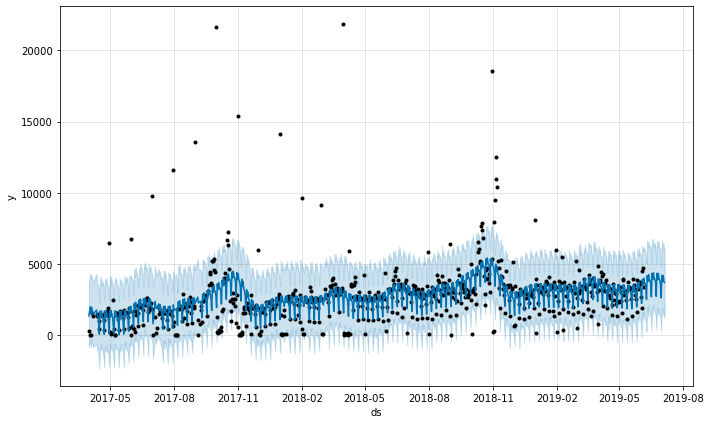

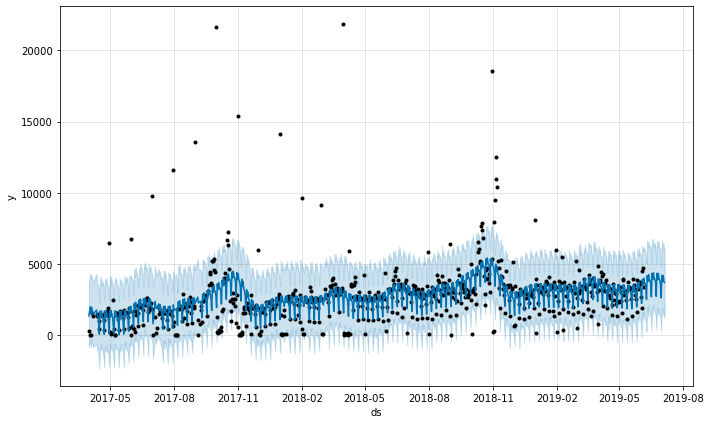

In [86]:
#Plotting the predicted projection
model3.plot(prediction3)

##### The prediction for group 1 has increased moderately, and an application count of slightly more than 5000 can be expected. 

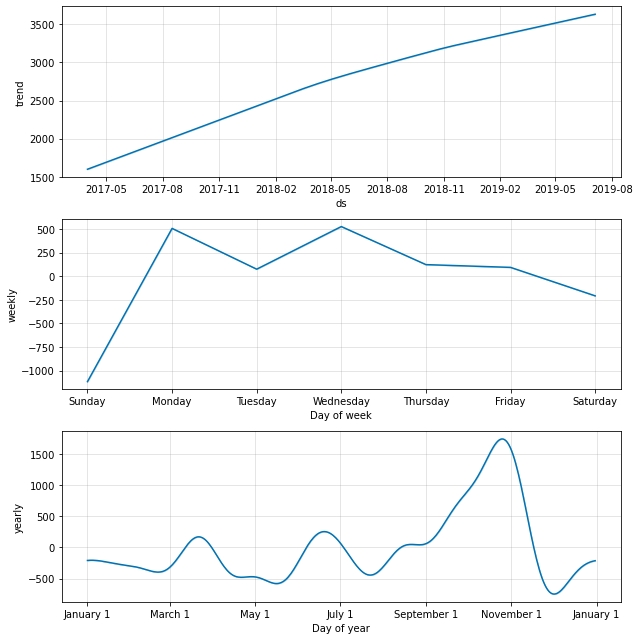

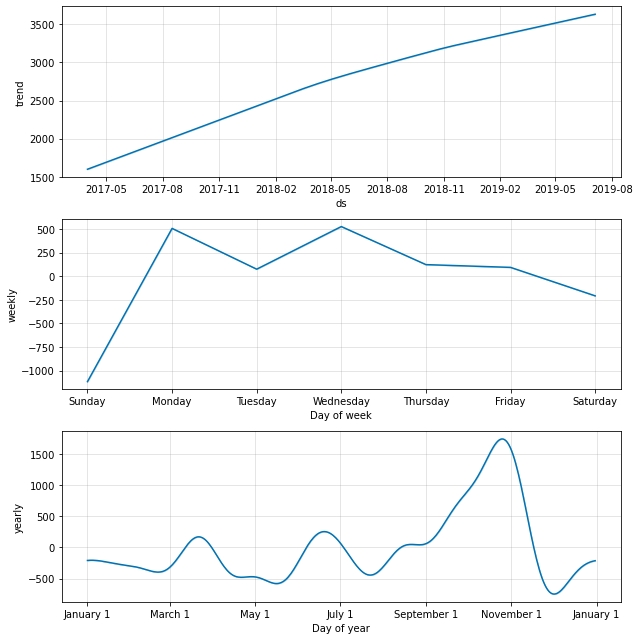

In [87]:
#Visualizing each of the components[Trends,Weekly,Yearly]
model3.plot_components(prediction3)

##### The following conclusions may be drawn from the group 1 data that is forecasted on a weekly, monthly, and annual basis.

##### In the first graph, it can be observed that the number of applications received has been steadily increasing from 2017 to 2019. It is safe to assume that it is nearly linear, meaning that as the number of years increases, so does the number of applications received.

##### The weekly trend from Sunday through Saturday is represented in the second graph. It is evident that two days, Mondays and Wednesdays, receive the most applications, with a little fall on Tuesday. The rest of the week, Thursday, Friday, and Saturday, show a gradual decline in the trend. There is no change in this inference wrt the inference drawn wrt the same graph in the previous section.

##### The third graph depicts a monthly pattern from 2017 to 2019, from which it can be deduced that the number of applications received generally progressively increases till November, where it reaches an all-time high, before falling steeply in December. This curve is quite similar to the one in the previous section.

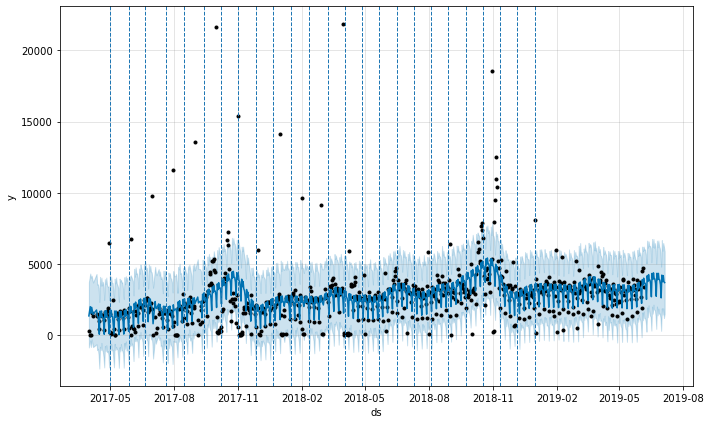

In [88]:
figure3 = model3.plot(prediction3)
for changepoint in model3.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

##### The vertical lines represent the change points (it shows the change in the direction of the data). 

### GROUP 2 

In [89]:
# Initializing the Model
model4=Prophet()

In [90]:
#Creating a subset of dataset with only application date and no of applicants
df4= group2[["application_date", "no_of_applicants"]]
df4

,application_date,no_of_applicants
0,2017-04-01,897.0
1,2017-04-02,605.0
2,2017-04-03,2016.0
3,2017-04-04,2245.0
4,2017-04-05,2415.0
...,...,...
809,2019-06-19,31360.0
810,2019-06-20,30255.0
811,2019-06-21,28593.0
812,2019-06-22,25863.0


In [91]:
#Removing na values
df4.dropna(axis=0,inplace=True)

In [92]:
#Renaming the columns
df4=df4.rename(columns={"application_date":"ds","no_of_applicants":"y"})
df4

,ds,y
0,2017-04-01,897.0
1,2017-04-02,605.0
2,2017-04-03,2016.0
3,2017-04-04,2245.0
4,2017-04-05,2415.0
...,...,...
809,2019-06-19,31360.0
810,2019-06-20,30255.0
811,2019-06-21,28593.0
812,2019-06-22,25863.0


In [93]:
#Fitting the model
model4.fit(df4)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
## Creating future dates of 30 days
forecast_dates4=model4.make_future_dataframe(periods=30)

In [95]:
forecast_dates4.tail()

,ds
839,2019-07-19
840,2019-07-20
841,2019-07-21
842,2019-07-22
843,2019-07-23


In [96]:
#Predicting values
prediction4=model4.predict(forecast_dates4)

In [97]:
prediction4.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-04-01,7590.941454,-4711.832587,18451.132708,7590.941454,7590.941454,-1142.986307,-1142.986307,-1142.986307,265.128748,265.128748,265.128748,-1408.115056,-1408.115056,-1408.115056,0.0,0.0,0.0,6447.955147
1,2017-04-02,7614.636212,-10204.153753,12744.194303,7614.636212,7614.636212,-6149.607238,-6149.607238,-6149.607238,-4505.859936,-4505.859936,-4505.859936,-1643.747302,-1643.747302,-1643.747302,0.0,0.0,0.0,1465.028974
2,2017-04-03,7638.330969,-6455.835614,16925.681900,7638.330969,7638.330969,-2084.303488,-2084.303488,-2084.303488,-235.416800,-235.416800,-235.416800,-1848.886688,-1848.886688,-1848.886688,0.0,0.0,0.0,5554.027481
3,2017-04-04,7662.025727,-5147.298798,18500.301731,7662.025727,7662.025727,-991.502785,-991.502785,-991.502785,1032.278827,1032.278827,1032.278827,-2023.781611,-2023.781611,-2023.781611,0.0,0.0,0.0,6670.522943
4,2017-04-05,7685.720485,-5828.300628,17725.622400,7685.720485,7685.720485,-1060.707377,-1060.707377,-1060.707377,1108.590443,1108.590443,1108.590443,-2169.297819,-2169.297819,-2169.297819,0.0,0.0,0.0,6625.013108


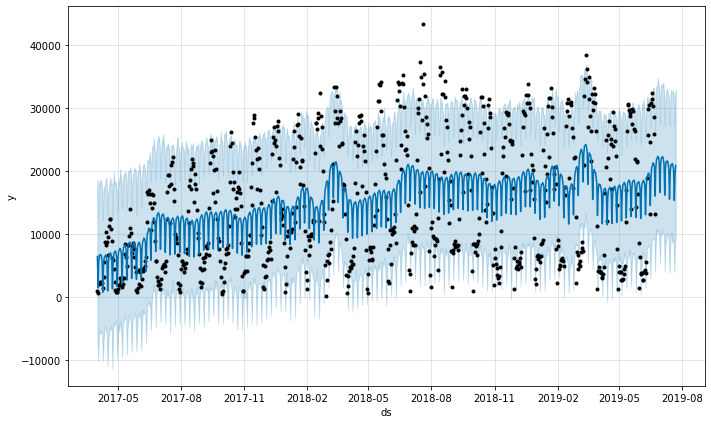

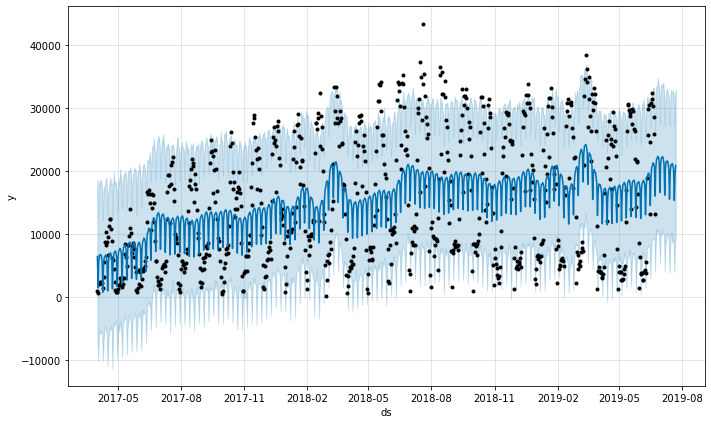

In [98]:
#Plotting the predicted projection
model4.plot(prediction4)

##### For group 2, there is a moderately increasing trend, may expect over 3000 applications.

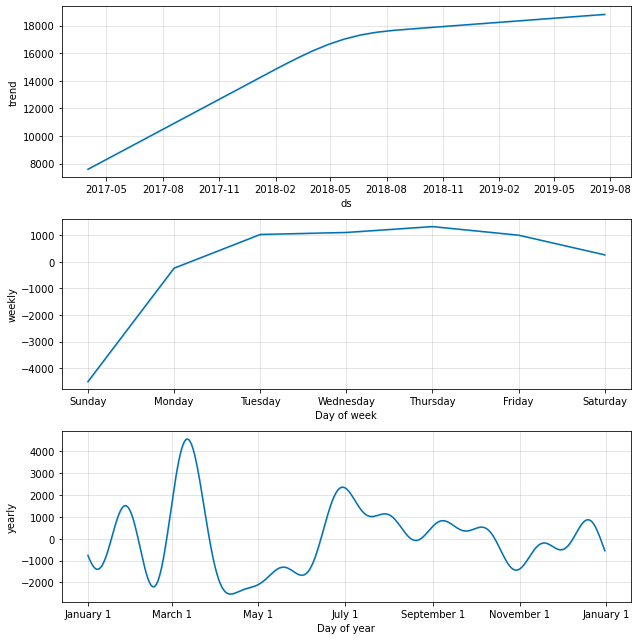

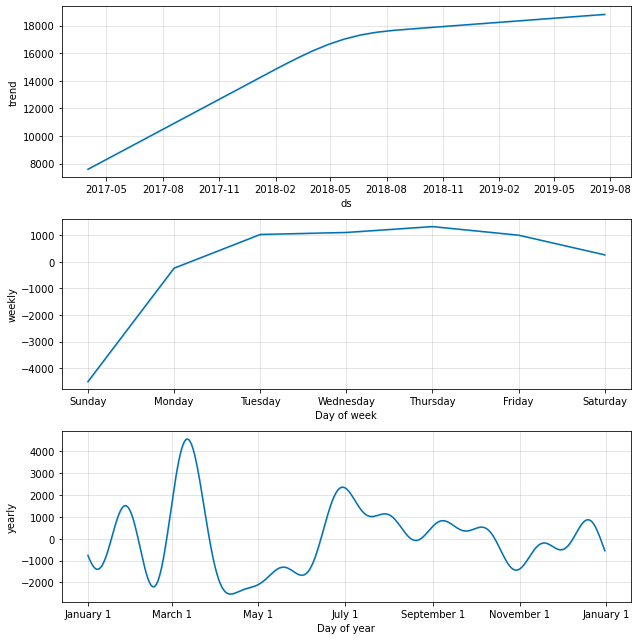

In [99]:
#Visualizing each of the components[Trends,Weekly,Yearly]
model4.plot_components(prediction4)

##### The following conclusions may be drawn from thegroup 2 data that is forecasted on a weekly, monthly, and annual basis.

##### In the first graph, which shows an annual trend, it can be observed that the number of applications increased gradually from 2017 to 2019.

##### The second graph shows a progressive increase from Monday to Thursday and a gradual reduction from Friday to Sunday on a weekly basis. This graph is similar to the corresponding graph in the previous section.

##### The third graph depicts the monthly pattern, which shows that the months of March and April receive the most applications, followed by June and July. This graph is also quite similar to the one in the previous section.

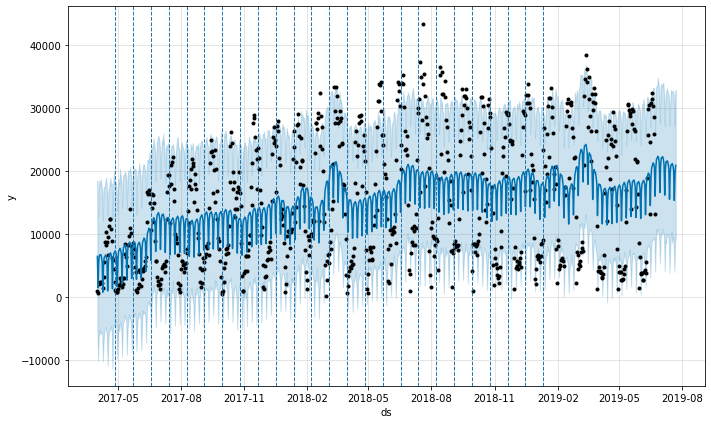

In [100]:
figure4 = model4.plot(prediction4)
for changepoint in model4.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

##### The vertical lines represent the change points (it shows the change in the direction of the data). 

### CONCLUSION 

##### On comparing segment 1 and group 1, it  can be observed that the number of applications received gradually increases. The same is true for segment 2 and group 2. The trends in the models are also consistent. The general behavior of the two methods employed in Prophet Model for segment 1 and segment 2 are quite similar. 